In [60]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using Elon Musk's face for this exercise but the logic can be applied for anyone

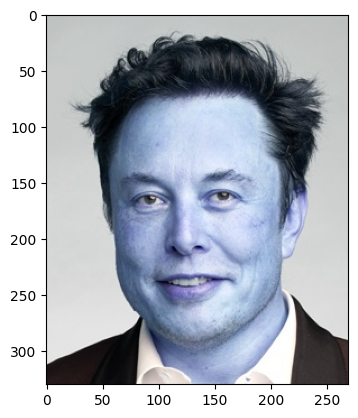

In [61]:
elon_face = plt.imread('Pictures/elon_face.jpg')
elon = plt.imread('Pictures/Elon2.jpg')
plt.imshow(elon_face)

In [62]:
elon_face.shape
elon.shape

(1536, 2048, 3)

In [63]:
height,width,channels = elon_face.shape

In [64]:
height

330

In [65]:
resize_factor = 0.5  #I actually tried various resize factors here to get to this. 
resized_template = cv2.resize(elon_face, (int(width * resize_factor), int(height * resize_factor)))
height, width, channels = resized_template.shape

In [66]:
height

165

In [67]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']

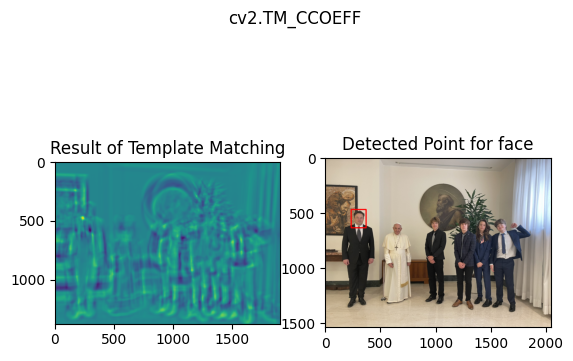

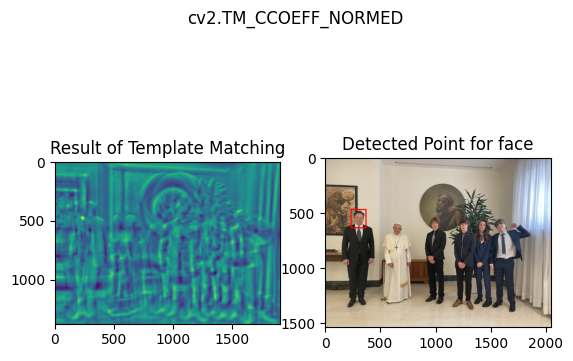

In [68]:
for m in methods:
    original = elon.copy()
    method = eval(m)

    res = cv2.matchTemplate(original, resized_template, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(original,top_left, bottom_right, 255, 10)

    #Plotting the results of template matching
    plt.subplot(121) 
    plt.imshow(res)
    plt.title('Result of Template Matching')
    plt.subplot(122)
    plt.imshow(original)
    plt.title('Detected Point for face')
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')